In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [6]:
!kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 35.3MB/s]


In [7]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [8]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [9]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
# Calculating the Missing Values % contribution in Data

df_null = data.isna().mean().round(4) * 100

df_null.sort_values(ascending=False)

price               0.0
highwaympg          0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
car_ID              0.0
dtype: float64

**A correlation matrix is used to find correlation between each column in dataset.I will show two ways to plot a correlation matrix**

In [13]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


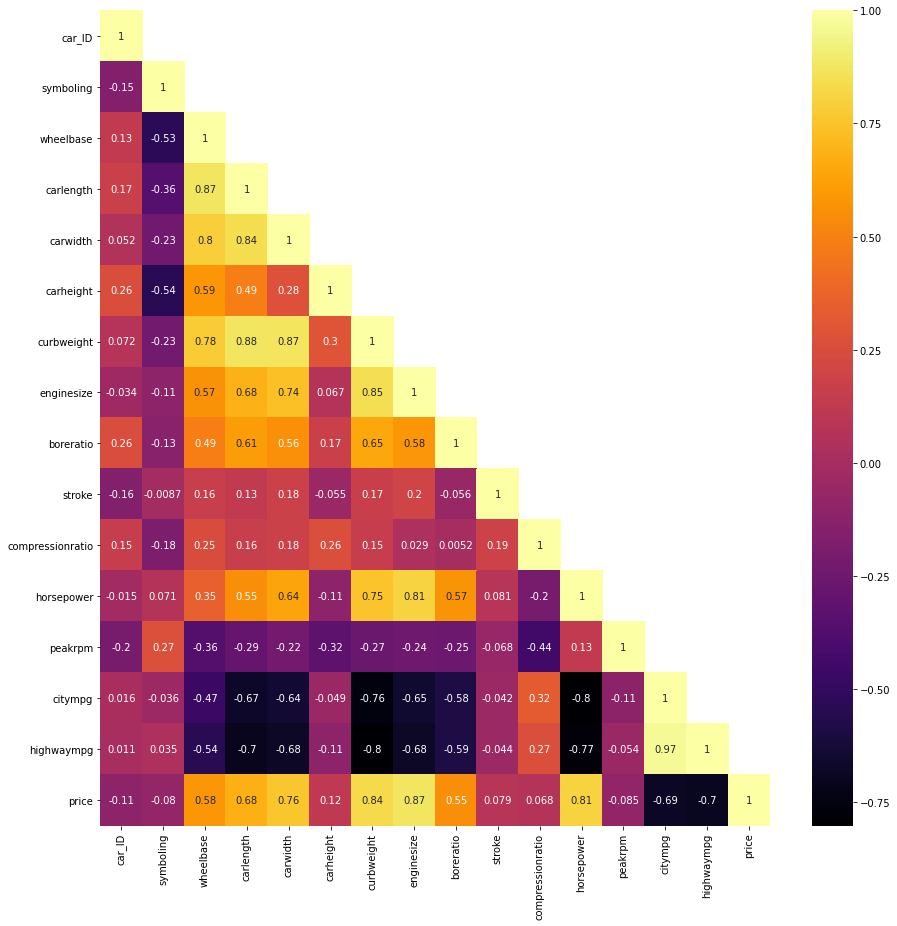

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

We need to do some basic cleansing activity in order to feed our model the correct data.

In [15]:
# dropping car_ID and CarName based on business knowledge

data = data.drop('car_ID',axis=1)
data = data.drop('CarName',axis=1)

In [16]:
#My own describe
pd.DataFrame({'missing':data.isna().mean(),
             'unicos':data.nunique(),
             'types': data.dtypes})

,missing,unicos,types
symboling,0.0,6,int64
fueltype,0.0,2,object
aspiration,0.0,2,object
doornumber,0.0,2,object
carbody,0.0,5,object
drivewheel,0.0,3,object
enginelocation,0.0,2,object
wheelbase,0.0,53,float64
carlength,0.0,75,float64
carwidth,0.0,44,float64


In [17]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
data.shape

(205, 24)

# **Encoding of Categorical Data Using Scikit-Learn and Mapping**

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['enginetype']=labelencoder.fit_transform(data['enginetype'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])

In [20]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,4,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,4,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,4,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

## **Splitting dataset into Train and Test set**

In [22]:
train_data=data.iloc[:103]
train_targets=data.price.iloc[:103]
train_targets=np.asarray(train_targets)
train_data.drop('price',axis=1,inplace=True)
train_data=np.asarray(train_data)

#print(train_data)
#print(train_data.shape)

test_data=data.iloc[103:166]
test_targets=data.price.iloc[103:166]
test_targets=np.asarray(test_targets)
test_data.drop('price',axis=1,inplace=True)
test_data=np.asarray(test_data)

print("test_data shape: ",test_data.shape)
test_data

test_data shape:  (63, 23)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[0.0e+00, 1.0e+00, 0.0e+00, ..., 5.2e+03, 1.9e+01, 2.5e+01],
       [3.0e+00, 1.0e+00, 0.0e+00, ..., 5.2e+03, 1.9e+01, 2.5e+01],
       [3.0e+00, 1.0e+00, 1.0e+00, ..., 5.2e+03, 1.7e+01, 2.3e+01],
       ...,
       [1.0e+00, 1.0e+00, 0.0e+00, ..., 4.8e+03, 2.9e+01, 3.4e+01],
       [1.0e+00, 1.0e+00, 0.0e+00, ..., 4.8e+03, 2.9e+01, 3.4e+01],
       [1.0e+00, 1.0e+00, 0.0e+00, ..., 6.6e+03, 2.6e+01, 2.9e+01]])

In [23]:
val_data=data.iloc[166:]
val_data.drop('price',axis=1,inplace=True)
val_data=np.asarray(val_data)

val_targets=data.price.iloc[166:]
val_targets=np.asarray(val_targets)

val_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[ 1.000e+00,  1.000e+00,  0.000e+00,  2.000e+00,  2.000e+00,
         2.000e+00,  0.000e+00,  9.450e+01,  1.687e+02,  6.400e+01,
         5.260e+01,  2.300e+03,  0.000e+00,  2.000e+00,  9.800e+01,
         5.000e+00,  3.240e+00,  3.080e+00,  9.400e+00,  1.120e+02,
         6.600e+03,  2.600e+01,  2.900e+01],
       [ 2.000e+00,  1.000e+00,  0.000e+00,  2.000e+00,  1.000e+00,
         2.000e+00,  0.000e+00,  9.840e+01,  1.762e+02,  6.560e+01,
         5.200e+01,  2.540e+03,  3.000e+00,  2.000e+00,  1.460e+02,
         5.000e+00,  3.620e+00,  3.500e+00,  9.300e+00,  1.160e+02,
         4.800e+03,  2.400e+01,  3.000e+01],
       [ 2.000e+00,  1.000e+00,  0.000e+00,  2.000e+00,  1.000e+00,
         2.000e+00,  0.000e+00,  9.840e+01,  1.762e+02,  6.560e+01,
         5.200e+01,  2.536e+03,  3.000e+00,  2.000e+00,  1.460e+02,
         5.000e+00,  3.620e+00,  3.500e+00,  9.300e+00,  1.160e+02,
         4.800e+03,  2.400e+01,  3.000e+01],
       [ 2.000e+00,  1.000e+00,  0.000e+00,  2.00

In [24]:
train_data.shape

(103, 23)

In [25]:
train_data

array([[3.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [3.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [1.0e+00, 1.0e+00, 0.0e+00, ..., 5.0e+03, 1.9e+01, 2.6e+01],
       ...,
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.2e+03, 2.7e+01, 3.4e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.2e+03, 1.7e+01, 2.2e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.2e+03, 1.7e+01, 2.2e+01]])

In [26]:
train_targets

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [27]:
train_targets.shape

(103,)

## **point to be noted: Whenever i tried to normalize the data then**
# ** I recieved empty values in 'mae' and 'loss' etc i.e nan** 

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [29]:
history = model.fit(train_data,train_targets,epochs=500,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 289392864.0000 - mae: 14136.4551 - val_loss: 198677216.0000 - val_mae: 13439.9902
Epoch 2/500
1/1 [==============================] - 0s 45ms/step - loss: 287802528.0000 - mae: 14083.1689 - val_loss: 197879984.0000 - val_mae: 13409.7627
Epoch 3/500
1/1 [==============================] - 0s 43ms/step - loss: 286823680.0000 - mae: 14049.0381 - val_loss: 197437728.0000 - val_mae: 13392.8799
Epoch 4/500
1/1 [==============================] - 0s 46ms/step - loss: 286247200.0000 - mae: 14028.0635 - val_loss: 197088864.0000 - val_mae: 13379.9043
Epoch 5/500
1/1 [==============================] - 0s 48ms/step - loss: 285834816.0000 - mae: 14012.8369 - val_loss: 196789088.0000 - val_mae: 13368.8506
Epoch 6/500
1/1 [==============================] - 0s 45ms/step - loss: 285496448.0000 - mae: 14000.7939 - val_loss: 196516448.0000 - val_mae: 13358.7969
Epoch 7/500
1/1 [==============================] - 0s 48ms/step - loss: 285193

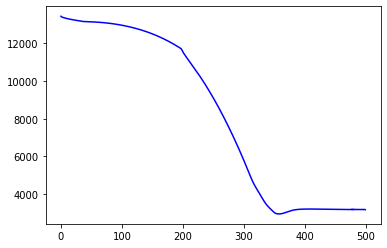

In [30]:
import matplotlib.pyplot as plt

val_mae=history.history['val_mae']
epochs=range(500)
plt.plot(epochs,val_mae,'b',label='val mae')

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(6,kernel_regularizer=regularizers.l2(0.01) ,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [32]:
history = model.fit(train_data,train_targets,epochs=380,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/380
1/1 [==============================] - 1s 922ms/step - loss: 282927584.0000 - mae: 13926.9658 - val_loss: 194101792.0000 - val_mae: 13271.5869
Epoch 2/380
1/1 [==============================] - 0s 49ms/step - loss: 282350688.0000 - mae: 13906.1992 - val_loss: 193741984.0000 - val_mae: 13258.1045
Epoch 3/380
1/1 [==============================] - 0s 44ms/step - loss: 281971904.0000 - mae: 13892.2031 - val_loss: 193468320.0000 - val_mae: 13247.8350
Epoch 4/380
1/1 [==============================] - 0s 44ms/step - loss: 281677888.0000 - mae: 13881.4463 - val_loss: 193246048.0000 - val_mae: 13239.4844
Epoch 5/380
1/1 [==============================] - 0s 47ms/step - loss: 281437536.0000 - mae: 13872.6641 - val_loss: 193053216.0000 - val_mae: 13232.2354
Epoch 6/380
1/1 [==============================] - 0s 44ms/step - loss: 281237312.0000 - mae: 13865.1660 - val_loss: 192886256.0000 - val_mae: 13225.9531
Epoch 7/380
1/1 [==============================] - 0s 52ms/step - loss: 281

In [43]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [44]:
history = model.fit(train_data,train_targets,epochs=500,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/500
1/1 [==============================] - 1s 879ms/step - loss: 290963584.0000 - mae: 14194.0742 - val_loss: 190532416.0000 - val_mae: 13137.9102
Epoch 2/500
1/1 [==============================] - 0s 45ms/step - loss: 282098400.0000 - mae: 13869.5068 - val_loss: 187104800.0000 - val_mae: 13009.0596
Epoch 3/500
1/1 [==============================] - 0s 44ms/step - loss: 278789536.0000 - mae: 13607.7949 - val_loss: 183575072.0000 - val_mae: 12875.6270
Epoch 4/500
1/1 [==============================] - 0s 44ms/step - loss: 270449408.0000 - mae: 13450.2031 - val_loss: 180498800.0000 - val_mae: 12758.6357
Epoch 5/500
1/1 [==============================] - 0s 46ms/step - loss: 272444000.0000 - mae: 13486.3643 - val_loss: 177802032.0000 - val_mae: 12653.8838
Epoch 6/500
1/1 [==============================] - 0s 55ms/step - loss: 271864352.0000 - mae: 13488.8057 - val_loss: 175168320.0000 - val_mae: 12551.0020
Epoch 7/500
1/1 [==============================] - 0s 49ms/step - loss: 262

In [45]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 6ms/step - loss: 35077496.0000 - mae: 3262.9246


In [46]:
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

test_mae_score: 3262.924560546875
test_mse_score: 35077496.0
